# Finate State Tranducers for Language Modeling

## Terminology

### Symbols & strings
- symbols come from an alphabet: letters, words, phonemes, etc.
- string: series of symbol: word, sentence, word

### Finite State Acceptor (FSA)
- Representation of **regular (rational) sets**.
- one symbol per edge

Can be used to check if string matches a pattern (computationally equivalent to a regex) or to generate strings which match this pattern. (also tokenization, compression)

- a number of states
    - at least one is initial 
    - at least one is final
- connection b/w states. symbol could be empty string.

### Finite State Transducers (FST)
- Representation of **rational binary relations**.
- two symbols per edge (one input, one output)

Can be used to translate strings in its input alphabet to strings in its output alphabet (e.g. dictionaries, context-dependent rules)

Extends FSA with the addition of:
- output labels on each edge

### Weighted State Accetpors/Transducers
Weight associated with each edge (as well as input & output for transducers). for instance weight along the path is product of probabilities and represent prob of the input string, sum of weights on 2 edges is the prob of either of theses alternatives. (e.g. n-gram, language translation)


## Language generation

### FSA: Part Of Speech sentence structure
DET: a determiner, N: noun, V: verb. state 5 is a final state

```fromState toState inSymbol [outSymbol] [weight]```

In [5]:
cat sent.fsa.txt

0 1 DET
1 2 N
2 3 V
3 4 DET
4 5 N
5


mapping from symbols to integers. - is always symbol 0

In [26]:
cat pos.voc

- 0
DET 1
N 2
V 3


In [1]:
fstcompile --acceptor -isymbols=pos.voc sent.fsa.txt > sent.fsa

In [11]:
fstprint -isymbols=pos.voc sent.fsa

0	1	DET	1
1	2	N	2
2	3	V	3
3	4	DET	1
4	5	N	2
5


In [20]:
fstdraw --isymbols=pos.voc sent.fsa | dot -Tpng > sent.png

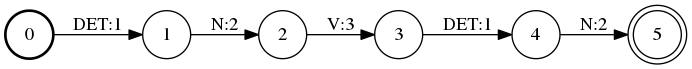

In [23]:
convert -rotate "90" sent.png sent_h.png
display < sent_h.png

### FST: dictionary from POS to Words
maps POS to words

In [28]:
cat dict.fst.txt

0 0 DET a
0 0 DET the
0 0 N cat
0 0 N dog
0 0 V chased
0 0 V bit
0


In [29]:
cat word.voc

- 0
a 1
the 2
cat 3
dog 4
chased 5
bit 6


In [30]:
fstcompile -isymbols=pos.voc -osymbols=word.voc dict.fst.txt > dict.fst

In [32]:
fstdraw --isymbols=pos.voc -osymbols=word.voc dict.fst | dot -Tpng >dict.png

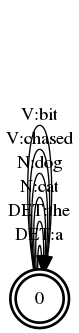

In [35]:
convert -rotate "90" dict.png dict_h.png
display < dict_h.png

### Final FST: regular grammar specifying a language with 32 possible sentences

In [36]:
fstcompose sent.fsa dict.fst > strings.fst

In [46]:
fstdraw --portrait --isymbols=pos.voc -osymbols=word.voc strings.fst | dot -Tpng > strings.png

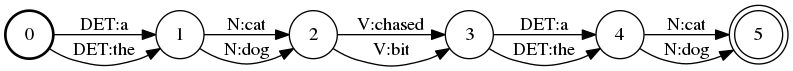

In [49]:
#convert -rotate "90" strings.png strings_h.png
display < strings.png

### Generation

In [45]:
for i in $(seq 1 10); do
    fstrandgen strings.fst | fstproject --project_output | \
        fstprint --acceptor --isymbols=word.voc | \
        awk 'BEGIN{printf("\n")}{printf("%s ",$3)}END{printf("\n")}'
done


a dog bit the dog  

a dog chased a dog  

the dog chased the cat  

the cat bit the cat  

a cat chased the cat  

a cat chased a cat  

the dog chased a cat  

the cat bit the dog  

the dog chased the cat  

the dog chased a cat  


### one sentence at a time
ctrl + enter to not move to next cell

In [19]:
fstrandgen strings.fst | fstproject --project_output | \
        fstprint --acceptor --isymbols=word.voc | \
        awk 'BEGIN{printf("\n")}{printf("%s ",$3)}END{printf("\n")}'


a dog chased a dog  
